In [1]:
""" To Do List
1)Find suitable groups based on spining data
2)Fins theh x,y,z distribution for all of the neurites
Find the length distribution for all of the neurites
Find the volume distribution for all of the neurites
Find the x, y, z distribution for all of the spining groups
For For all spining groups:
Take out the dendrite numbers and filter by size
Do heat map of compartments


"""

' To Do List\n1)Find suitable groups based on spining data\n2)Fins theh x,y,z distribution for all of the neurites\nFind the length distribution for all of the neurites\nFind the volume distribution for all of the neurites\nFind the x, y, z distribution for all of the spining groups\nFor For all spining groups:\nTake out the dendrite numbers and filter by size\nDo heat map of compartments\n\n\n'

In [2]:
import datajoint as dj
import numpy as np
import time

from meshparty import trimesh_io
import pandas as pd
import seaborn as sns
sns.set() #sets the asethetics parameters in what set

In [3]:
#setting the address and the username
dj.config['database.host'] = '10.28.0.34'
dj.config['database.user'] = 'celiib'
dj.config['database.password'] = 'newceliipass'
dj.config['safemode']=True
dj.config["display.limit"] = 20

schema = dj.schema('microns_ta3p100')
ta3p100 = dj.create_virtual_module('ta3p100', 'microns_ta3p100')


Connecting celiib@10.28.0.34:3306


In [4]:
len(ta3p100.NeuriteTargetsRevised() & "spine_num<total"),len(ta3p100.NeuriteTargetsRevised() )

(32068, 32124)

In [5]:
#creates the table with spine data without the spine label
#how to filter out the spine proportion

#have to first remove the ones that have only spine synapses


neurite_targets_no_spine = (ta3p100.NeuriteTargetsRevised() & "spine_num<total").proj(spine_head_prop="spine_head_prop/(1-spine_prop)",
                                                         spine_neck_prop="spine_neck_prop/(1-spine_prop)",
                                                         shaft_prop="shaft_prop/(1-spine_prop)",
                                                         non_spine_prop="non_spine_prop/(1-spine_prop)",
                                                         total="total-spine_num")



In [6]:
#different lengths based on the number of synapses threshold

print(len(neurite_targets_no_spine))
print(len(neurite_targets_no_spine & "total>12"))
print(len(neurite_targets_no_spine & "total>10")) 
print(len(neurite_targets_no_spine & "total>8")) 
print(len(neurite_targets_no_spine & "total>6")) 

32068
1169
2068
3875
7473


# find Groups for Spine Data Only

In [7]:
neurite_targets_no_spine_10 = (neurite_targets_no_spine & "total>6")

In [8]:
#get heatmap of the data

neurite_spine_data = neurite_targets_no_spine_10.fetch(as_dict=True)

spine_df = pd.DataFrame(neurite_spine_data)
spine_df_base = spine_df.drop(columns=['segmentation', 'segment_id',"total","spine_neck_prop","non_spine_prop"])

In [9]:
#sort by the first column and then do heat map
spine_df_base_sh_sort = spine_df_base.sort_values(by='spine_head_prop', ascending=False)
spine_df_base_sh_sort

,spine_head_prop,shaft_prop
7095,1.0,0.000000
3578,1.0,0.000000
1482,1.0,0.000000
3766,1.0,0.000000
978,1.0,0.000000
509,1.0,0.000000
1882,1.0,0.000000
543,1.0,0.000000
1982,1.0,0.000000
7334,1.0,0.000000


# 4-10 Adjustment for Jake

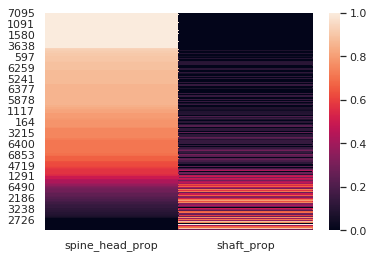

In [10]:
#heat map of spine heads
spine_head_sort = sns.heatmap(spine_df_base_sh_sort)

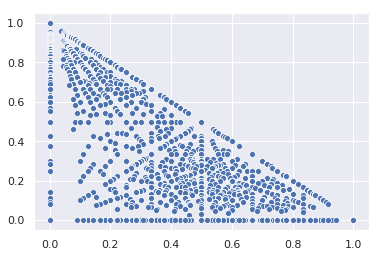

In [18]:
#Wants it as a line plot:
x=spine_df_base_sh_sort["shaft_prop"].to_numpy()
x
y=spine_df_base_sh_sort["spine_head_prop"].to_numpy()
pine_head_sort = sns.scatterplot(x=x,y=y)

In [21]:
y

array([1.00000004, 1.00000004, 1.00000004, ..., 0.        , 0.        ,
       0.        ])

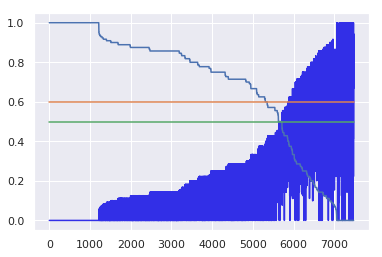

In [82]:

#need to change the color of the lines
spine_head_sort = sns.lineplot(x=range(0,len(x)),y=x,color="#322FE7")
spine_head_sort = sns.lineplot(x=range(0,len(y)),y=y)
spine_head_sort = sns.lineplot(x=[0,len(x)],y=[0.6,0.6])
spine_head_sort = sns.lineplot(x=[0,len(x)],y=[0.5,0.5])




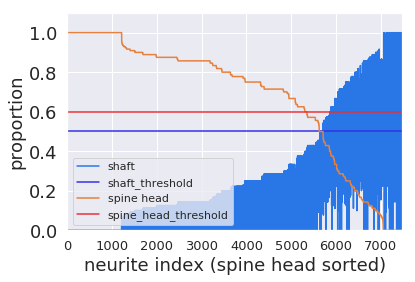

In [81]:
import matplotlib.pyplot as plt

plt.xlim([0,len(x)])
plt.ylim([0,1.1])
plt.plot(range(0,len(x)),x,color = '#2977E7',label='shaft')
plt.plot([0,len(x)],[0.5,0.5],color="#322FE7",label='shaft_threshold')
plt.plot(range(0,len(y)),y,color="#E7803C",label='spine head')
plt.plot([0,len(x)],[0.6,0.6],color="#E73035",label='spine_head_threshold')

plt.ylabel('proportion',fontsize=18)
plt.xlabel('neurite index (spine head sorted)',fontsize=18)
plt.legend(loc=3)


plt.tick_params(axis='x', which='major', labelsize=13)
plt.tick_params(axis='y', which='major', labelsize=18)

plt.show()


# MAKE DIVIDED HEAT MAP

In [84]:
neurite_spine_data #TABLE that has no spine data

neurite_spine_data

[OrderedDict([('segmentation', 2),
              ('segment_id', 648518346341351512),
              ('spine_head_prop', 0.8750000157160684),
              ('spine_neck_prop', 0.0),
              ('shaft_prop', 0.1250000010477379),
              ('non_spine_prop', 0.0),
              ('total', 8.0)]),
 OrderedDict([('segmentation', 2),
              ('segment_id', 648518346341351525),
              ('spine_head_prop', 0.7777777658200559),
              ('spine_neck_prop', 0.11111111295076065),
              ('shaft_prop', 0.11111111295076065),
              ('non_spine_prop', 0.0),
              ('total', 9.0)]),
 OrderedDict([('segmentation', 2),
              ('segment_id', 648518346341351631),
              ('spine_head_prop', 0.909090931504226),
              ('spine_neck_prop', 0.0),
              ('shaft_prop', 0.09090908610623727),
              ('non_spine_prop', 0.0),
              ('total', 11.0)]),
 OrderedDict([('segmentation', 2),
              ('segment_id', 648518346341351

# OLD CODE TESTING DIVISION

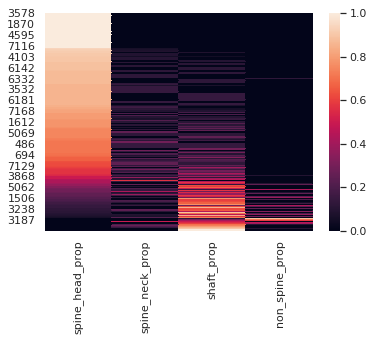

In [11]:
#sorting by ascending for spine head and descending for spine shaft
#df.sort_values(['a', 'b'], ascending=[True, False])
spine_df_base_hANDsh = spine_df_base.sort_values(['spine_head_prop','shaft_prop','spine_neck_prop'], ascending=[False,True,False])

#OBSERVATION: seems to be groups 
head_AND_shaft_desc_sort = sns.heatmap(spine_df_base_hANDsh)      

In [12]:
"""
OBSERVATIONS: groups from first glance
1) Heavy spine head
2) Spine head and Spine neck
3) Spine head and Spine shaft
4) Non-spine
5) Spine shaft

How to sort these groups
1) Use datajoint to filter out the highest proportion spine_heads and download (put into pandas table)
2) Download rest of data and sort by shaft and neck in opposite directions
3) see what happens with non spine (could do in between steps 1 and 2)
"""

'\nOBSERVATIONS: groups from first glance\n1) Heavy spine head\n2) Spine head and Spine neck\n3) Spine head and Spine shaft\n4) Non-spine\n5) Spine shaft\n\nHow to sort these groups\n1) Use datajoint to filter out the highest proportion spine_heads and download (put into pandas table)\n2) Download rest of data and sort by shaft and neck in opposite directions\n3) see what happens with non spine (could do in between steps 1 and 2)\n'

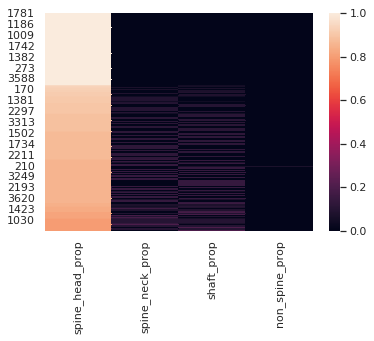

In [13]:
neurite_targets_no_spine_10_head = (neurite_targets_no_spine_10 & "spine_head_prop>0.80").fetch(as_dict=True)
mostly_head = pd.DataFrame(neurite_targets_no_spine_10_head)
mostly_head_base = mostly_head.drop(columns=['segmentation', 'segment_id',"total"])
mostly_head_base_sorted = mostly_head_base.sort_values("spine_head_prop",ascending=False)
sns.heatmap(mostly_head_base_sorted)

3835


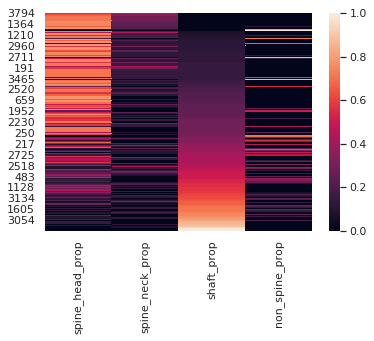

In [14]:
#get the left over data
neurite_targets_no_spine_10_non_head = (neurite_targets_no_spine_10 - neurite_targets_no_spine_10_head).fetch(as_dict=True)
print(len(neurite_targets_no_spine_10_non_head))
non_head = pd.DataFrame(neurite_targets_no_spine_10_non_head)
non_head_base = non_head.drop(columns=['segmentation', 'segment_id',"total"])
non_head_base_sorted = non_head_base.sort_values(["shaft_prop","spine_neck_prop"],ascending=[True,False])
sns.heatmap(non_head_base_sorted)

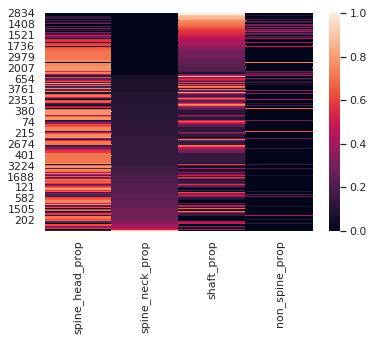

In [16]:
non_head_base_sorted_neck = non_head_base.sort_values(["spine_neck_prop","shaft_prop"],ascending=[True,False])
sns.heatmap(non_head_base_sorted_neck)

924


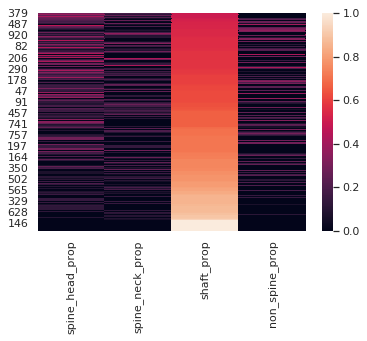

In [49]:
#get the left over data

neurite_targets_no_spine_10_shaft_pre = (neurite_targets_no_spine_10 & "spine_head_prop<0.80" & "shaft_prop>0.5")
#neurite_targets_no_spine_10_shaft_pre = (neurite_targets_no_spine_10 )#.fecth(as_dict=True)
neurite_targets_no_spine_10_shaft = neurite_targets_no_spine_10_shaft_pre.fetch(as_dict=True)

neurite_targets_no_spine_10_shaft
print(len(neurite_targets_no_spine_10_shaft))
shaft = pd.DataFrame(neurite_targets_no_spine_10_shaft)
shaft_base = shaft.drop(columns=['segmentation', 'segment_id',"total"])
shaft_base_sorted = shaft_base.sort_values("shaft_prop",ascending=True)
sns.heatmap(shaft_base_sorted)

In [50]:
#Get the rest of the data and do heat map
neurite_heads = (neurite_targets_no_spine_10 & "spine_head_prop>0.80")
neurite_shafts = (neurite_targets_no_spine_10_shaft_pre)
rest_targets = (neurite_targets_no_spine_10 - neurite_targets_no_spine_10_shaft_pre.proj() 
                                - neurite_heads.proj())
print(len(neurite_heads),len(neurite_shafts),len(rest_targets),len(neurite_targets_no_spine_10))
print(len(neurite_heads)+len(neurite_shafts)+len(rest_targets)==len(neurite_targets_no_spine_10))

3638 924 2911 7473
True


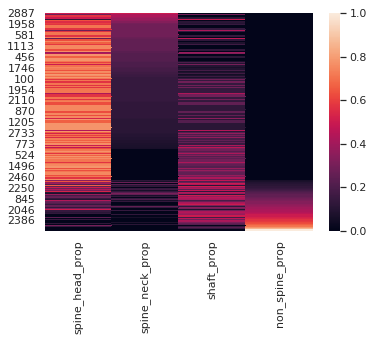

In [51]:
#like this one better of the two
rest = rest_targets.fetch(as_dict=True)
rest_df = pd.DataFrame(rest)
rest_base = rest_df.drop(columns=['segmentation', 'segment_id',"total"])
rest_base_sorted = rest_base.sort_values(["non_spine_prop","spine_neck_prop"],ascending=[True,False])
rest_base_sorted_2 = rest_base.sort_values(["spine_neck_prop","non_spine_prop"],ascending=[False,True])
sns.heatmap(rest_base_sorted)


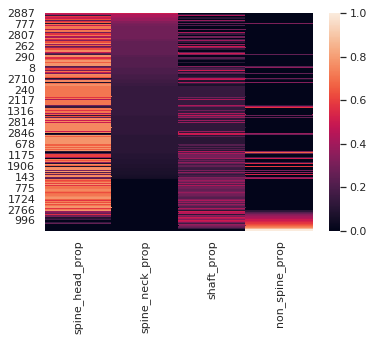

In [52]:
sns.heatmap(rest_base_sorted_2)

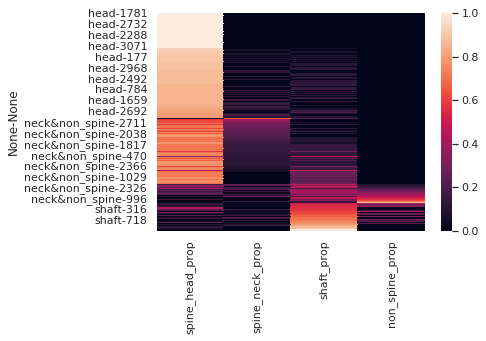

In [53]:
#combine the data tables all into one to represent total clustering
frames = [mostly_head_base_sorted,rest_base_sorted,shaft_base_sorted]
result = pd.concat(frames, keys=['head', 'neck&non_spine', 'shaft'])
sns.heatmap(result)

In [60]:

funconnect = dj.create_virtual_module("fc","goldfunc_fc")
#n_syn_union: A only syn, B only syn, max of (syn onto A, syn onto B)
funconnect.SharedInput()

segmentation segmentation id,segment_id segment id unique within each Segmentation,segment_b segment id unique within each Segmentation,n_syn_a number of synapses for cell A,n_syn_b number of synapses for cell B,n_syn_union number of unique synapses for both,n_syn_shared number of shared synapses,n_seg_a number of segments for cell A,n_seg_b number of segments for cell B,n_seg_union number of unique segments for both,n_seg_shared number of shared segments
2,648518346341352006,648518346341352223,99,65,163,1,92,58,149,1
2,648518346341352006,648518346341353019,99,5,104,0,92,4,96,0
2,648518346341352006,648518346341353186,99,84,183,0,92,78,170,0
2,648518346341352006,648518346341353574,99,36,135,0,92,30,122,0
2,648518346341352006,648518346341353607,99,115,212,2,92,101,191,2
2,648518346341352006,648518346341353883,99,28,127,0,92,20,112,0
2,648518346341352006,648518346341354006,99,12,111,0,92,12,104,0
2,648518346341352006,648518346341354307,99,33,132,0,92,33,125,0
2,648518346341352006,648518346341354370,99,276,375,0,92,245,337,0
2,648518346341352006,648518346341354962,99,15,114,0,92,14,106,0


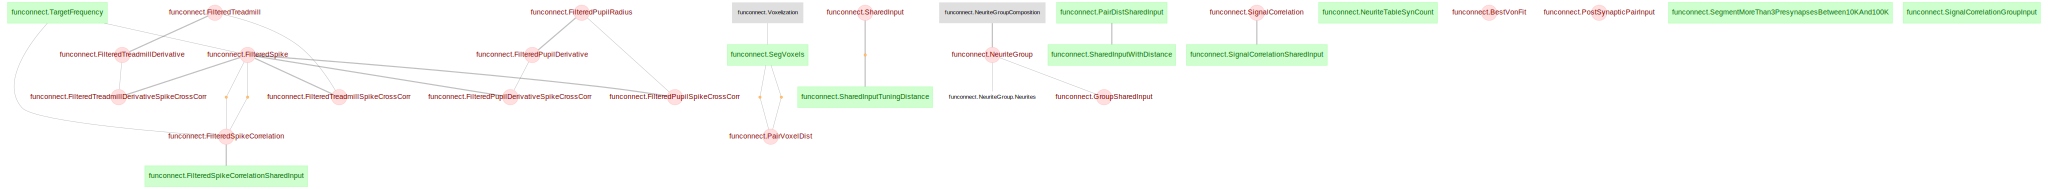

In [62]:
dj.ERD(funconnect)